In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools
from ast import literal_eval

import warnings
warnings.filterwarnings('ignore')

file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787686 entries, 0 to 787685
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_id                 787686 non-null  int64  
 1   company_id             787686 non-null  int64  
 2   job_title_short        787686 non-null  object 
 3   job_title              787685 non-null  object 
 4   job_location           786633 non-null  object 
 5   job_via                787677 non-null  object 
 6   job_schedule_type      774981 non-null  object 
 7   job_work_from_home     787686 non-null  bool   
 8   search_location        787686 non-null  object 
 9   job_posted_date        787686 non-null  object 
 10  job_no_degree_mention  787686 non-null  bool   
 11  job_health_insurance   787686 non-null  bool   
 12  job_country            787634 non-null  object 
 13  salary_rate            33100 non-null   object 
 14  salary_year_avg        22034 non-nul

In [6]:
data.head()

,job_id,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,description_tokens
0,0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,9/25/2023 17:46,False,False,Serbia,NaN,NaN,NaN,"['tableau', 'sql', 'aws']"
1,55,1,Cloud Engineer,Storage and Virtualization Engineer,"Kuwait City, Kuwait",via Trabajo.org,Full-time,False,Kuwait,7/30/2023 17:49,True,False,Kuwait,NaN,NaN,NaN,"['excel', 'tableau', 'sql', 'power_bi']"
2,66,2,Data Analyst,Data Analyst et Scientist F/H,"Paris, France",via Emplois Trabajo.org,Full-time,False,France,7/28/2023 17:28,False,False,France,NaN,NaN,NaN,"['azure', 'excel', 'sql']"
3,76,3,Data Engineer,Data Engineer,"Denver, CO",via LinkedIn,Contractor,False,"Illinois, United States",4/3/2023 17:14,False,False,United States,hour,NaN,70.0,['excel']
4,81,4,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Contractor,True,Canada,3/25/2023 17:25,False,False,Canada,NaN,NaN,NaN,"['excel', 'powerpoint']"


In [8]:
data.describe().round()

,job_id,company_id,salary_year_avg,salary_hour_avg
count,787686.0,787686.0,22034.0,10665.0
mean,751461.0,97969.0,123269.0,47.0
std,530243.0,160375.0,48271.0,22.0
min,0.0,0.0,15000.0,8.0
25%,278516.0,3332.0,90000.0,28.0
50%,672704.0,23326.0,115000.0,46.0
75%,1185031.0,112107.0,150000.0,61.0
max,1826678.0,787681.0,960000.0,391.0


In [10]:
# Number of people on LinkedIn
total_people = 8984843

# Percentage of people who are unemployed
unemployed_percentage = 3.21 / 100

# Number of jobs each unemployed person applies to
jobs_per_person = 200

# Calculate the number of unemployed people and job applications
unemployed_people = round(total_people * unemployed_percentage * jobs_per_person)

# Print the result
print(f"Total number of job applications: {unemployed_people}")


Total number of job applications: 57682692


In [12]:
# Load the dataset
file_path = r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv"
data = pd.read_csv(file_path)

# Extract and normalize skill keywords with error handling
def safe_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return []

data['description_tokens'] = data['description_tokens'].apply(lambda x: safe_literal_eval(x) if not pd.isnull(x) else [])

# Simplify the data to only include title and description_tokens
jobs = data[['job_title_short', 'description_tokens']]

# Function to calculate Jaccard similarity
def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# Find the most similar jobs for a given job
def find_similar_jobs(job_index, jobs, top_n=5):
    target_job = jobs.iloc[job_index]
    similarities = []
    
    for i, job in jobs.iterrows():
        if i != job_index:
            similarity = jaccard_similarity(target_job['description_tokens'], job['description_tokens'])
            similarities.append((job['job_title_short'], similarity))
    
    # Sort jobs by similarity
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    # Return the top_n most similar jobs
    return similarities[:top_n]

# Example usage: Find the top 5 similar jobs to the first job
job_index = 0
similar_jobs = find_similar_jobs(job_index, jobs)
print(f"Job: {jobs.iloc[job_index]['job_title_short']}")
print("Most similar jobs:")
for job, similarity in similar_jobs:
    print(f"{job} (Similarity: {similarity:.2f})")


Job: Data Analyst
Most similar jobs:
Data Analyst (Similarity: 1.00)
Cloud Engineer (Similarity: 1.00)
Data Engineer (Similarity: 1.00)
Data Engineer (Similarity: 1.00)
Software Engineer (Similarity: 1.00)


In [14]:
# Load the dataset
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include='number')
non_numeric_cols = data.select_dtypes(exclude='number')

# Descriptive statistics for numeric columns
numeric_desc = numeric_cols.describe().round()

# Descriptive statistics for non-numeric columns
non_numeric_desc = non_numeric_cols.describe(include='all').round()

# Print the results
print("Descriptive Statistics for Numeric Columns:")
print(numeric_desc)
print("\nDescriptive Statistics for Non-Numeric Columns:")
print(non_numeric_desc)


Descriptive Statistics for Numeric Columns:
          job_id  company_id  salary_year_avg  salary_hour_avg
count   787686.0    787686.0          22034.0          10665.0
mean    751461.0     97969.0         123269.0             47.0
std     530243.0    160375.0          48271.0             22.0
min          0.0         0.0          15000.0              8.0
25%     278516.0      3332.0          90000.0             28.0
50%     672704.0     23326.0         115000.0             46.0
75%    1185031.0    112107.0         150000.0             61.0
max    1826678.0    787681.0         960000.0            391.0

Descriptive Statistics for Non-Numeric Columns:
       job_title_short      job_title job_location       job_via  \
count           787686         787685       786633        787677   
unique              10         235023        17222          7916   
top       Data Analyst  Data Engineer     Anywhere  via LinkedIn   
freq            196593          54030        69606        186990   


Exploratory Data Analysis for salary_year_avg:

count     22034.0
mean     123269.0
std       48271.0
min       15000.0
25%       90000.0
50%      115000.0
75%      150000.0
max      960000.0
Name: salary_year_avg, dtype: float64


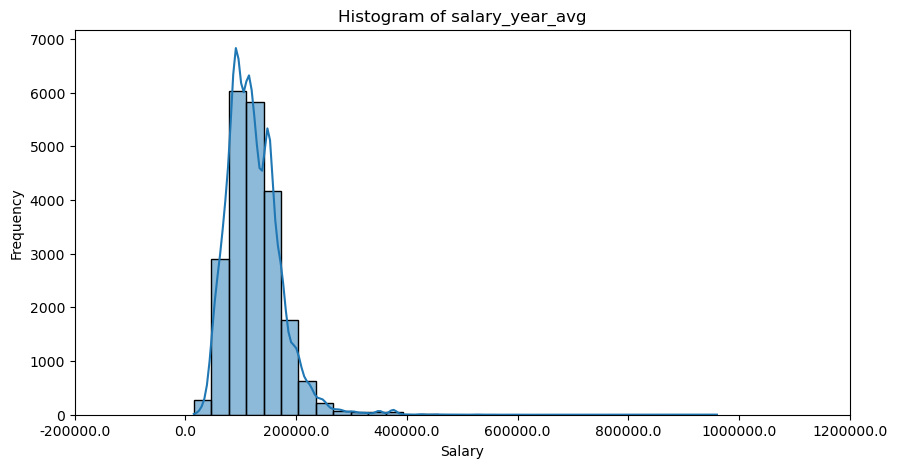

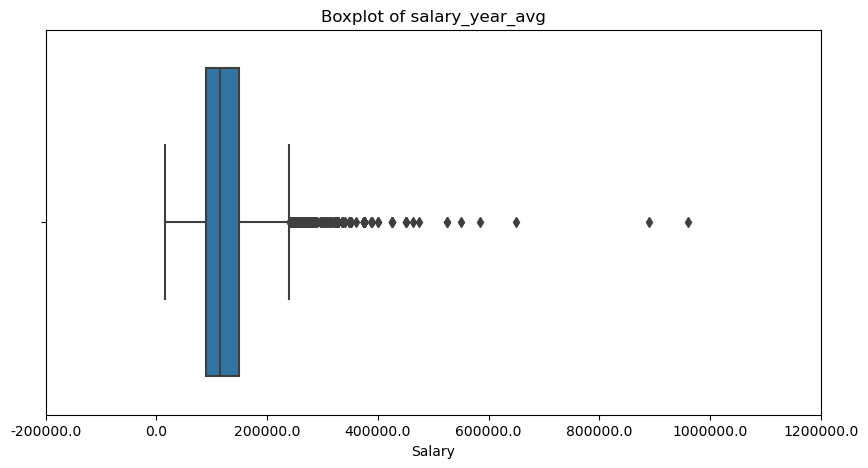

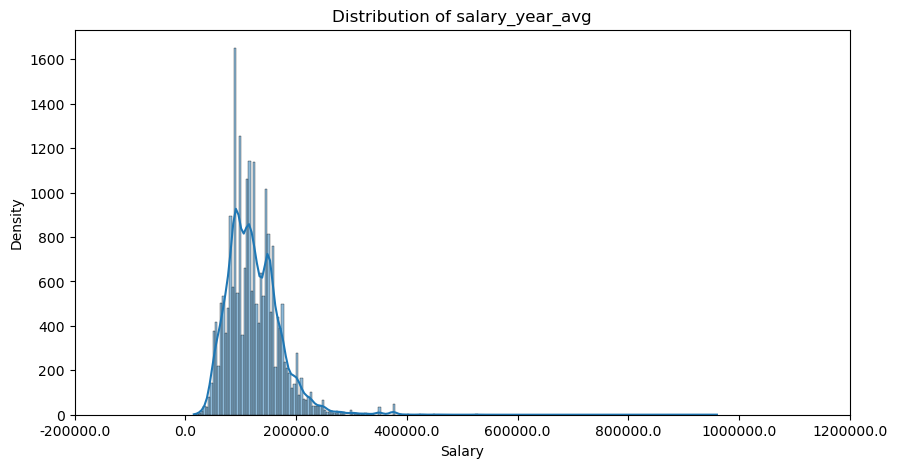

In [16]:
# Load the dataset 
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Identify and clean 'salary' columns
salary_columns = [col for col in data.columns if 'salary_year_avg' in col.lower()]

# Ensure salary columns are numeric (converting if necessary)
for col in salary_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Remove rows with NaN values in salary columns
data = data.dropna(subset=salary_columns)

# Perform EDA on each 'salary' column
for col in salary_columns:
    print(f"Exploratory Data Analysis for {col}:\n")
    
    # Summary statistics rounded to zero decimal places
    summary_stats = data[col].describe().round(0)
    print(summary_stats)
    
    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.xticks(ticks=plt.xticks()[0], labels=[round(x, 0) for x in plt.xticks()[0]])
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Salary')
    plt.xticks(ticks=plt.xticks()[0], labels=[round(x, 0) for x in plt.xticks()[0]])
    plt.show()
    
    # Distribution plot
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Salary')
    plt.ylabel('Density')
    plt.xticks(ticks=plt.xticks()[0], labels=[round(x, 0) for x in plt.xticks()[0]])
    plt.show()


Exploratory Data Analysis for salary_year_avg:

count     22034.0
mean     123269.0
std       48271.0
min       15000.0
25%       90000.0
50%      115000.0
75%      150000.0
max      960000.0
Name: salary_year_avg, dtype: float64


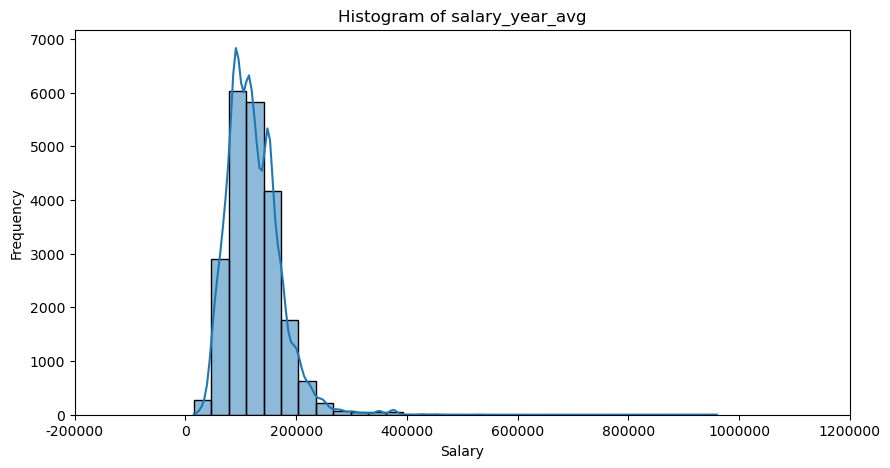

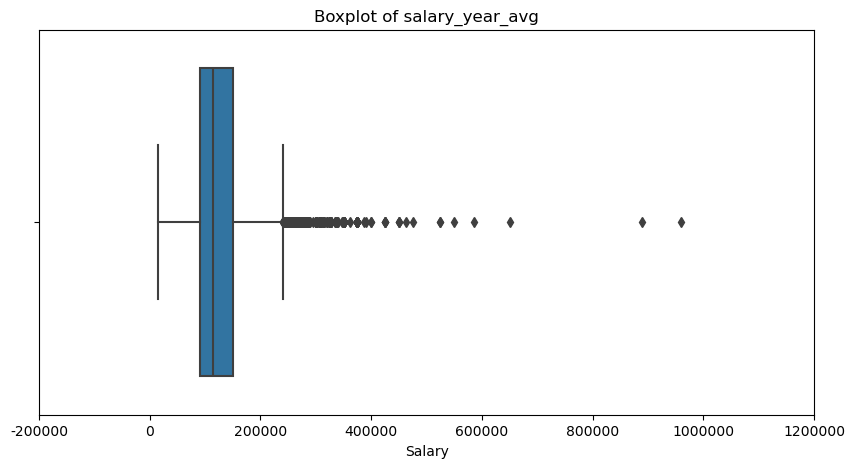

In [18]:
# Load the dataset
file_path = r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv"
data = pd.read_csv(file_path)

# Identify and clean 'salary' columns
salary_columns = [col for col in data.columns if 'salary_year_avg' in col.lower()]

# Ensure salary columns are numeric (converting if necessary)
for col in salary_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Remove rows with NaN values in salary columns
data = data.dropna(subset=salary_columns)

# Perform EDA on each 'salary' column
for col in salary_columns:
    print(f"Exploratory Data Analysis for {col}:\n")
    
    # Summary statistics rounded to zero decimal places
    summary_stats = data[col].describe().round(0)
    print(summary_stats)
    
    # Histogram with KDE
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.xticks(ticks=plt.xticks()[0], labels=[int(x) for x in plt.xticks()[0]])
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Salary')
    plt.xticks(ticks=plt.xticks()[0], labels=[int(x) for x in plt.xticks()[0]])
    plt.show()


Median Hourly Salary: 46.0


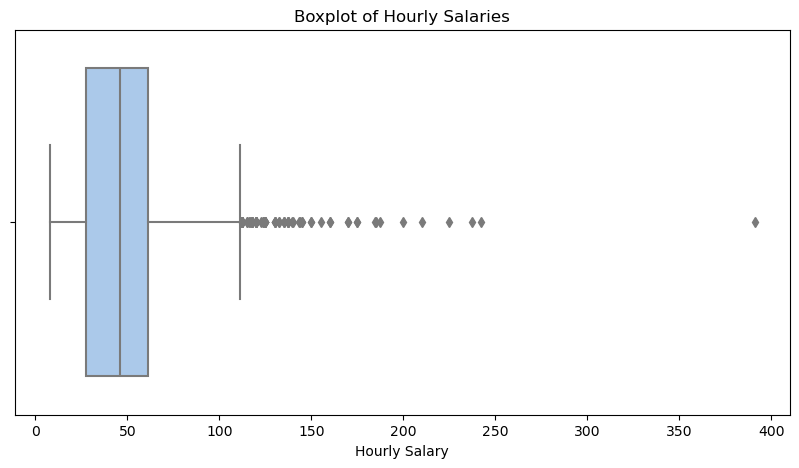

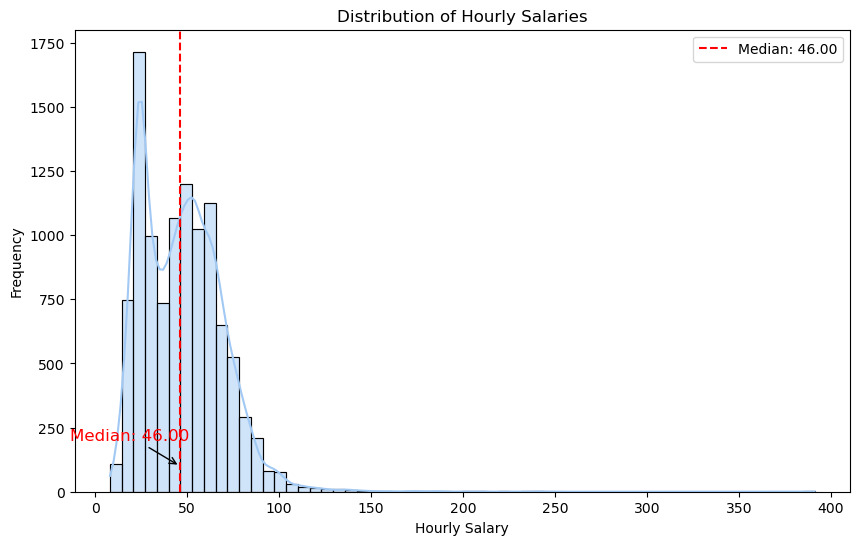

In [20]:
# Load Dataset
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Filter the dataset to include only hourly salaries
hourly_salaries = data['salary_hour_avg'].dropna()

# Calculate and print the median of the hourly salaries
median_hourly_salary = hourly_salaries.median()
print("Median Hourly Salary:", median_hourly_salary)

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=hourly_salaries, color=sns.color_palette("pastel")[0])
plt.title('Boxplot of Hourly Salaries')
plt.xlabel('Hourly Salary')

# Annotate the median
plt.annotate(f'Median: {median_hourly_salary:.2f}', xy=(0.5, median_hourly_salary), xytext=(0.55, median_hourly_salary + 500),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red', horizontalalignment='left')

plt.show()

# Plotting the distribution of hourly salaries
plt.figure(figsize=(10, 6))
sns.histplot(hourly_salaries, kde=True, bins=60, color=sns.color_palette("pastel")[0])
plt.title('Distribution of Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Frequency')

# Annotate the median
plt.axvline(median_hourly_salary, color='red', linestyle='--', label=f'Median: {median_hourly_salary:.2f}')
plt.annotate(f'Median: {median_hourly_salary:.2f}', xy=(median_hourly_salary, 100), xytext=(median_hourly_salary + 5, 200),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='red', horizontalalignment='right')

plt.legend()
plt.show()


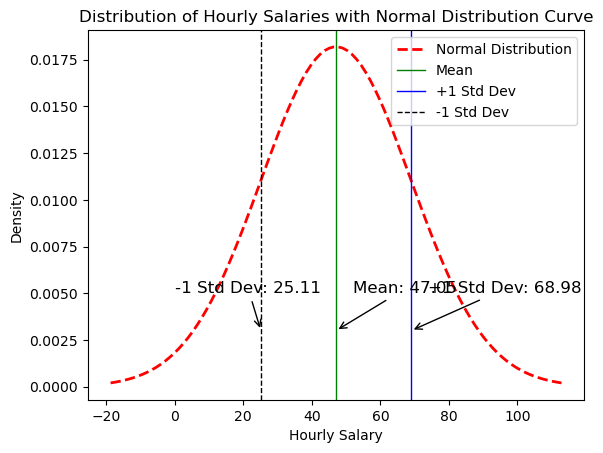

In [22]:
# Remove rows where salary_hourly is NaN
hourly_salaries = data['salary_hour_avg'].dropna()

# Calculate mean and standard deviation of hourly salaries
mean_salary = np.mean(hourly_salaries)
std_dev_salary = np.std(hourly_salaries)

# Generate points for the normal distribution curve
x = np.linspace(mean_salary - 3*std_dev_salary, mean_salary + 3*std_dev_salary, 100)
y = 1/(std_dev_salary * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean_salary) / std_dev_salary)**2)

# Plotting the histogram of hourly salaries with the normal distribution curve
#plt.figure(figsize=(10, 6))
#sns.histplot(hourly_salaries, kde=True, bins=30, color='skyblue', stat='density')
plt.plot(x, y, color='red', linestyle='--', linewidth=2)
plt.title('Distribution of Hourly Salaries with Normal Distribution Curve')
plt.xlabel('Hourly Salary')
plt.ylabel('Density')
plt.legend(['Normal Distribution', 'Hourly Salaries'])

# Annotate mean and standard deviation on the plot
plt.axvline(mean_salary, color='green', linestyle='-', linewidth=1)
plt.annotate('Mean: {:.2f}'.format(mean_salary), xy=(mean_salary, 0.003), xytext=(mean_salary + 5, 0.005),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.axvline(mean_salary + std_dev_salary, color='blue', linestyle='-', linewidth=1)
plt.annotate('+1 Std Dev: {:.2f}'.format(mean_salary + std_dev_salary), 
             xy=(mean_salary + std_dev_salary, 0.003), xytext=(mean_salary + std_dev_salary + 5, 0.005),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.axvline(mean_salary - std_dev_salary, color='black', linestyle='--', linewidth=1)
plt.annotate('-1 Std Dev: {:.2f}'.format(mean_salary - std_dev_salary), 
             xy=(mean_salary - std_dev_salary, 0.003), xytext=(mean_salary - std_dev_salary - 25, 0.005),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.legend(['Normal Distribution', 'Mean', '+1 Std Dev', '-1 Std Dev'])
plt.show()

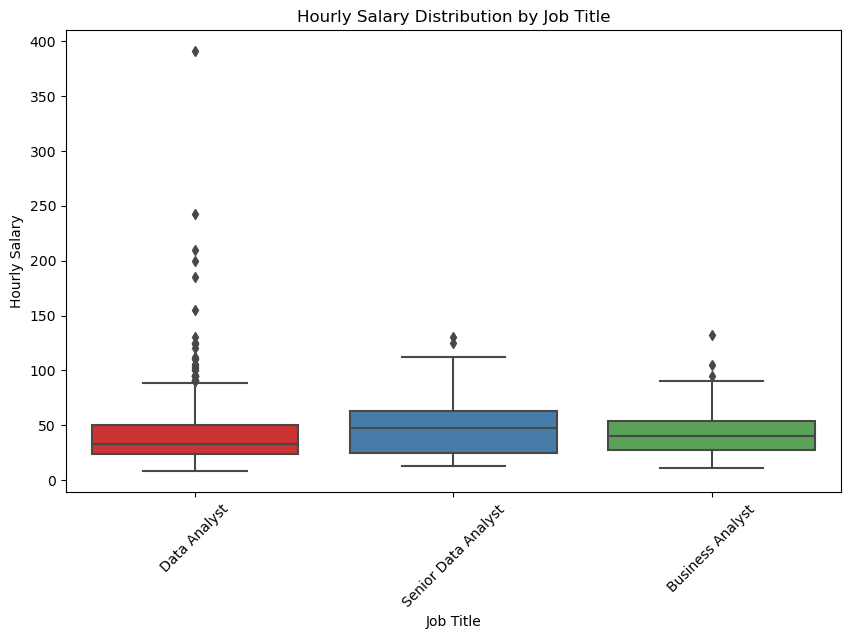

In [26]:
# Filter data for specific job titles
job_titles = ["Data Analyst", "Business Analyst", "Senior Data Analyst"]
filtered_data = data[data['job_title_short'].isin(job_titles)]

# Remove rows where salary_hourly is NaN
filtered_data = filtered_data.dropna(subset=['salary_hour_avg'])

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title_short', y='salary_hour_avg', data=filtered_data, palette='Set1')
plt.title('Hourly Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Hourly Salary')
plt.xticks(rotation=45)
plt.show()

Top 10 Most Requested Job Titles:
job_title_short
Data Analyst                 196593
Data Engineer                186679
Data Scientist               172726
Business Analyst              49160
Software Engineer             45019
Senior Data Engineer          44692
Senior Data Scientist         37076
Senior Data Analyst           29289
Machine Learning Engineer     14106
Cloud Engineer                12346
Name: count, dtype: int64


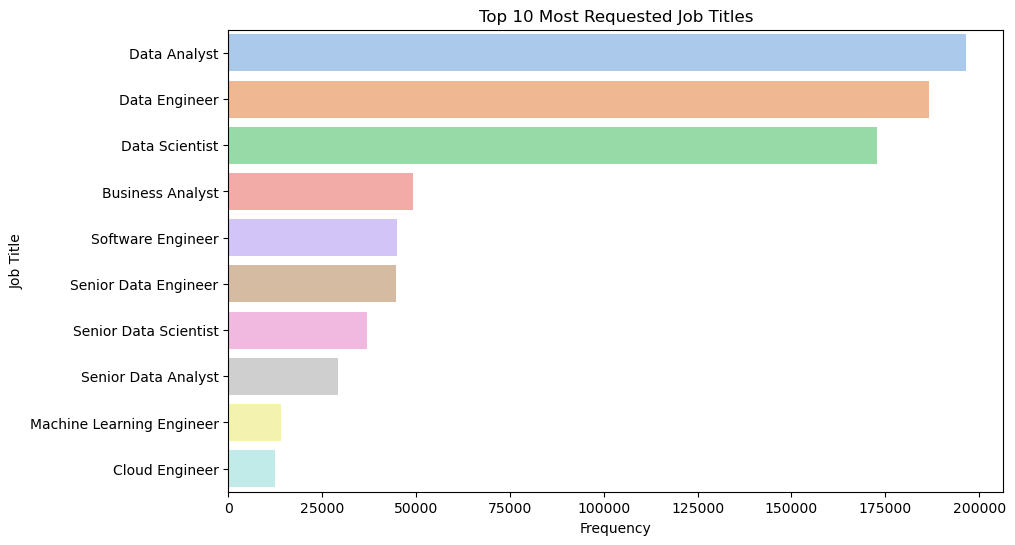

In [28]:
# Load the dataset
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Count the frequency of job titles
top_job_titles = data['job_title_short'].value_counts().head(10)

print("Top 10 Most Requested Job Titles:")
print(top_job_titles)

# Plotting the top job titles 
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='pastel')
plt.title('Top 10 Most Requested Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()


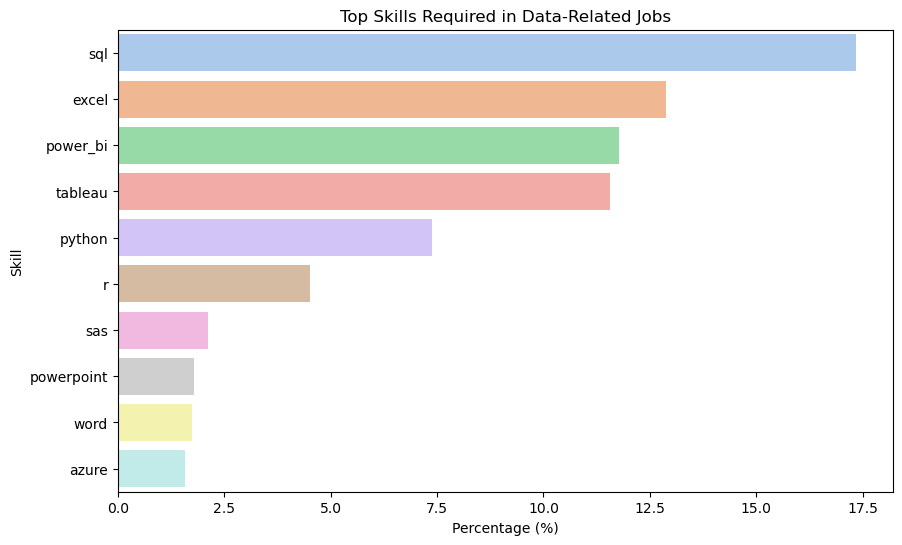

In [30]:
# Load the dataset
file_path = r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv"
data = pd.read_csv(file_path)

# Convert strings to lists only if they are formatted correctly
data['description_tokens'] = data['description_tokens'].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else x)

# Drop rows where description_tokens are not lists (if needed)
data = data[data['description_tokens'].apply(lambda x: isinstance(x, list))]

# Flatten the list of lists to a single list of skills
all_skills = list(itertools.chain(*data['description_tokens']))

# Count skill frequency
skill_counts = Counter(all_skills)
total_skills = sum(skill_counts.values())  # Total number of skills

# Create DataFrame for skill frequencies and calculate percentages
skill_freq_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)
skill_freq_df['Percentage'] = (skill_freq_df['Frequency'] / total_skills) * 100

# Filter top skills for visualization
top_skills = skill_freq_df.head(10)

# Plotting the top skills 
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Percentage', y='Skill', data=top_skills, palette='pastel')
plt.title('Top Skills Required in Data-Related Jobs')
plt.xlabel('Percentage (%)')
plt.ylabel('Skill')
plt.show()


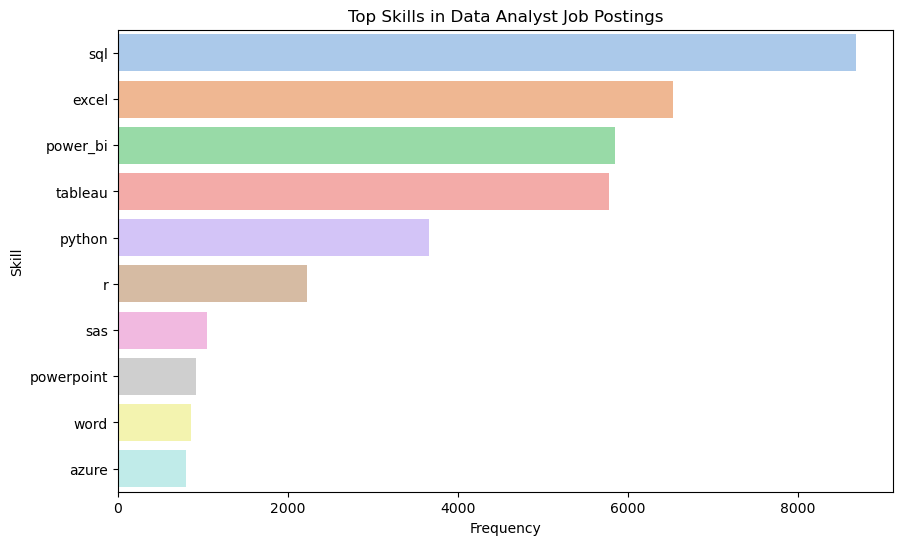

Top skill in Data Analyst job postings: sql with frequency: 8686


In [40]:
# Load the dataset
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Filter data for "Data Analyst" job titles
data_analyst_jobs = data[data['job_title_short'] == 'Data Analyst']

# Extract and normalize skill keywords for "Data Analyst" job postings
data_analyst_jobs['description_tokens'] = data_analyst_jobs['description_tokens'].apply(lambda x: eval(x) if pd.notnull(x) else [])
all_skills = list(itertools.chain(*data_analyst_jobs['description_tokens']))

# Count skill frequency
skill_counts = Counter(all_skills)
skill_freq_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Get the top skills (you can change the number to show more top skills if needed)
top_skills = skill_freq_df.head(10)

# Plotting the top skills using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Skill', data=top_skills, palette='pastel')
plt.title('Top Skills in Data Analyst Job Postings')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()

# Print the top skill and its frequency
top_skill = top_skills.iloc[0]  # Assuming you want the top skill
print(f"Top skill in Data Analyst job postings: {top_skill['Skill']} with frequency: {top_skill['Frequency']}")


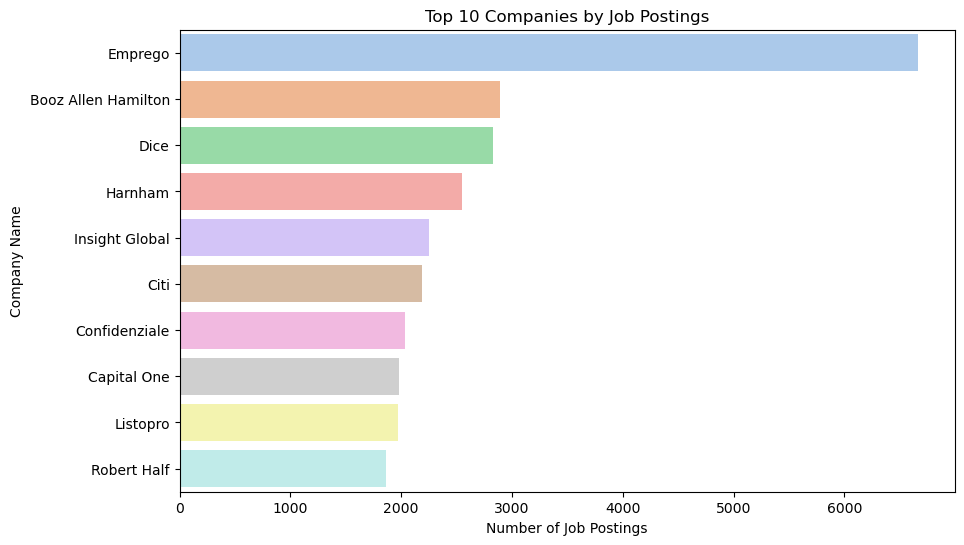

In [52]:
# Load data
job_postings_file = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
company_dim_file = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\company_dim.csv")

job_postings = pd.read_csv(job_postings_file)
company_dim = pd.read_csv(company_dim_file)

# Merge job_postings_fact with company_dim on company_id
merged_data = pd.merge(job_postings, company_dim, on='company_id', how='inner')

# Count job postings by company_name
top_companies = merged_data['name'].value_counts().head(10)

# Plotting the top companies by job postings
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='pastel')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.show()


Top 10 Companies by Average Yearly Salary:
name
MSP Staffing  LTD                              890000.0
Mantys                                         650000.0
ReServe                                        585000.0
East River Electric Power Cooperative, Inc.    537000.0
WhatsApp                                       463500.0
ЛАНИТ                                          400000.0
Greenfield Source                              390000.0
YETI Coolers                                   375000.0
Blue Cross and Blue Shield of Minnesota        375000.0
Illuminate Mission Solutions                   375000.0
Name: salary_year_avg, dtype: float64


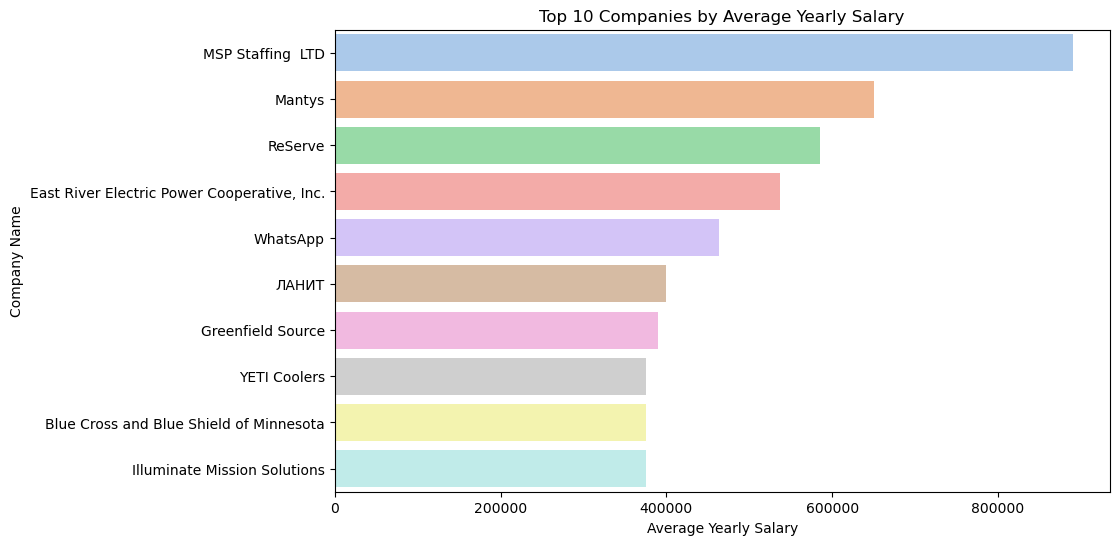

In [58]:
# Load data
job_postings_file = r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv"
company_dim_file = r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\company_dim.csv"

job_postings = pd.read_csv(job_postings_file)
company_dim = pd.read_csv(company_dim_file)

# Merge job_postings_fact with company_dim on company_id
merged_data = pd.merge(job_postings, company_dim, left_on='company_id', right_on='company_id', how='inner')

# Remove rows where salary_year_avg is NaN
merged_data = merged_data.dropna(subset=['salary_year_avg'])

# Group by company_name and calculate the average yearly salary
company_avg_salary = merged_data.groupby('name')['salary_year_avg'].mean().sort_values(ascending=False).head(10)

print("Top 10 Companies by Average Yearly Salary:")
print(company_avg_salary)

# Plotting the top 10 companies by average yearly salary 
plt.figure(figsize=(10, 6))
sns.barplot(x=company_avg_salary.values, y=company_avg_salary.index, palette='pastel')
plt.title('Top 10 Companies by Average Yearly Salary')
plt.xlabel('Average Yearly Salary')
plt.ylabel('Company Name')
plt.show()


Top 10 Job Locations: 
job_location
Anywhere                       69606
Singapore                      23423
Paris, France                  12354
Bengaluru, Karnataka, India    11517
London, UK                     10578
Madrid, Spain                   9805
New York, NY                    8193
India                           7671
United States                   7449
Hong Kong                       7362
Name: count, dtype: int64


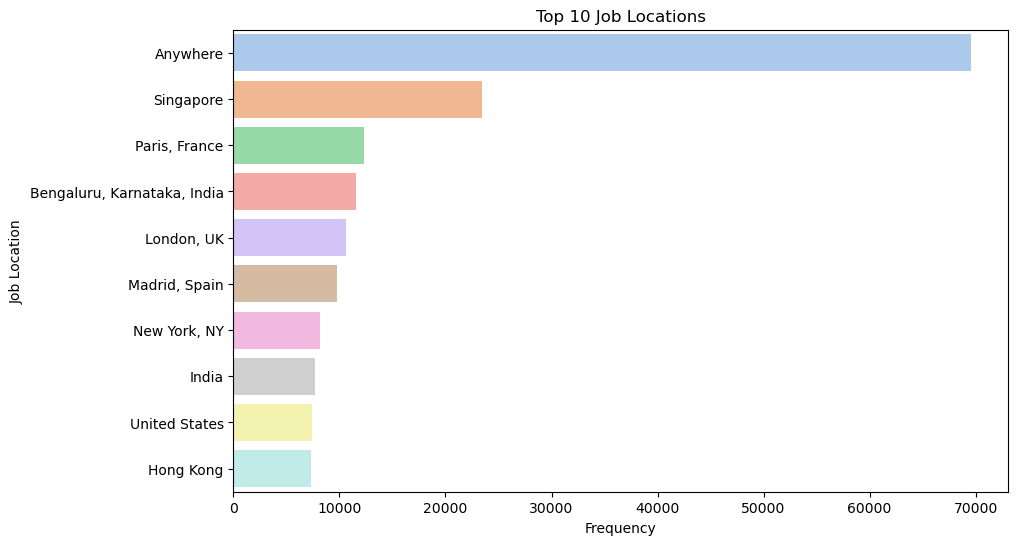

In [64]:
# Load the dataset
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Remove potential white space issues in the 'location' column
data['job_location'] = data['job_location'].str.strip()

# Count the frequency of job locations
top_job_locations = data['job_location'].value_counts().head(10)
print("Top 10 Job Locations: ")
print(top_job_locations)

# Plotting the top job locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_locations.values, y=top_job_locations.index, palette='pastel')
plt.title('Top 10 Job Locations')
plt.xlabel('Frequency')
plt.ylabel('Job Location')
plt.show()


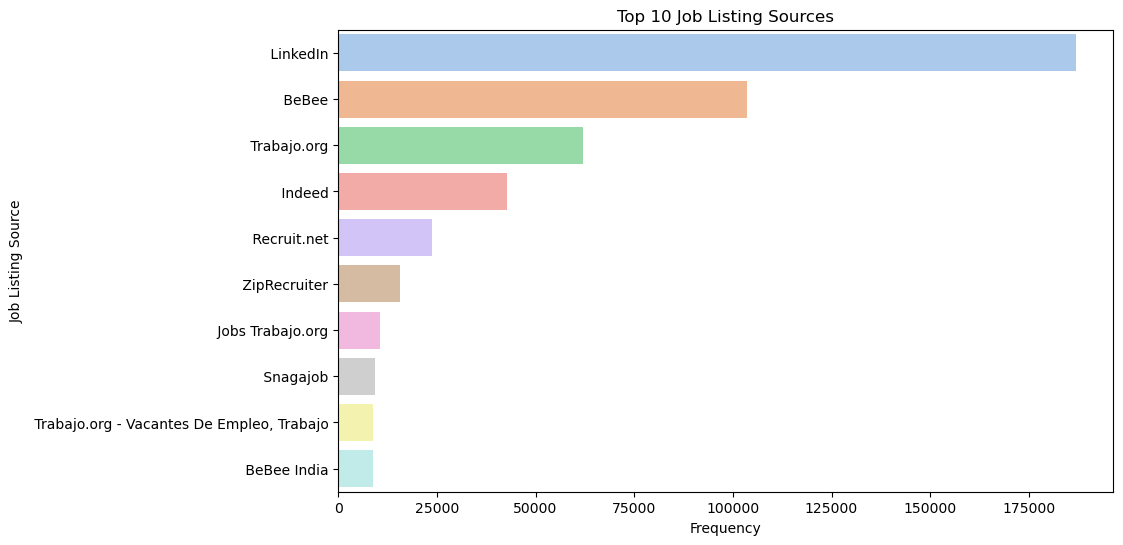

In [68]:
# Load the dataset
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Removing via from the 'via' column
data['job_via'] = data['job_via'].str[3:]
# Count the frequency of job listing sources
top_sources = data['job_via'].value_counts().head(10)

# Plotting the top job listing sources
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.values, y=top_sources.index, palette='pastel')
plt.title('Top 10 Job Listing Sources')
plt.xlabel('Frequency')
plt.ylabel('Job Listing Source')
plt.show()


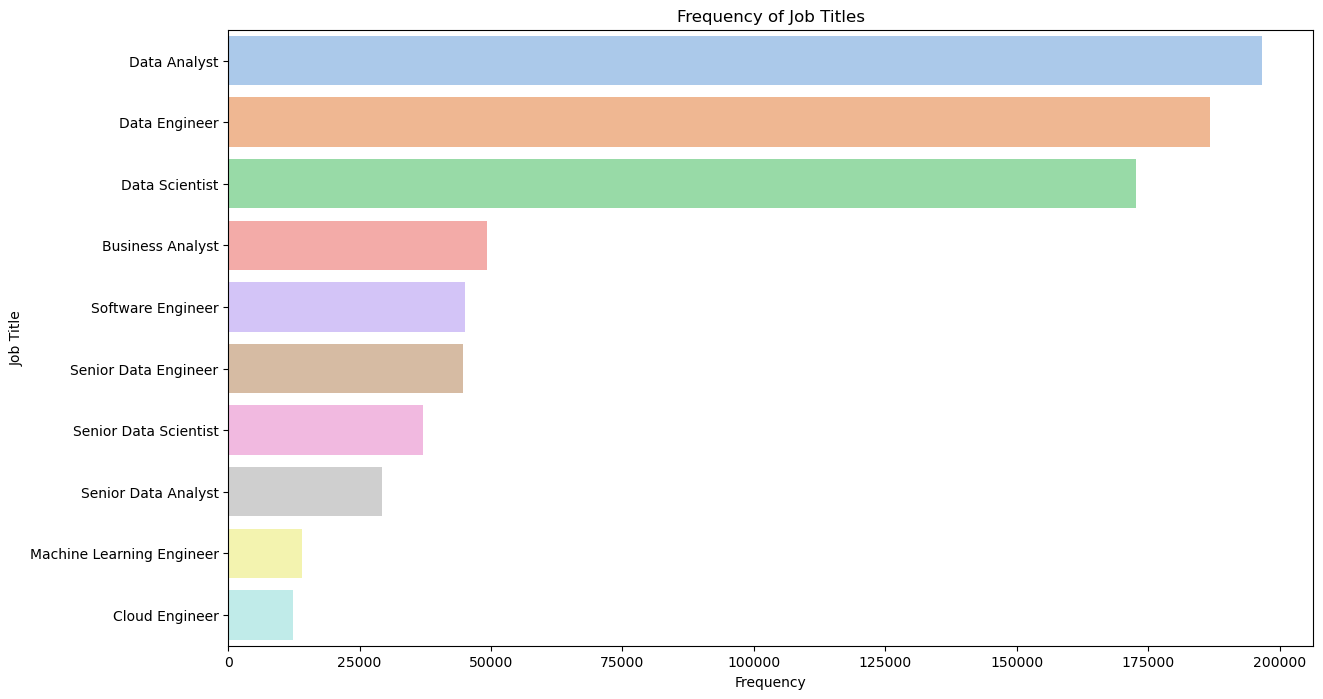

In [70]:
# Load the dataset
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Count the frequency of job titles
title_counts = data['job_title_short'].value_counts()

# Convert the Series to a DataFrame for easier plotting with Seaborn
title_freq_df = title_counts.reset_index()
title_freq_df.columns = ['Job Title', 'Frequency']

# Plotting the top job titles
plt.figure(figsize=(14, 8))
sns.barplot(x='Frequency', y='Job Title', data=title_freq_df, palette='pastel')
plt.title('Frequency of Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()


In [76]:
top_titles = data['job_title_short'].value_counts().head(10)
top_titles

job_title_short
Data Analyst                 196593
Data Engineer                186679
Data Scientist               172726
Business Analyst              49160
Software Engineer             45019
Senior Data Engineer          44692
Senior Data Scientist         37076
Senior Data Analyst           29289
Machine Learning Engineer     14106
Cloud Engineer                12346
Name: count, dtype: int64

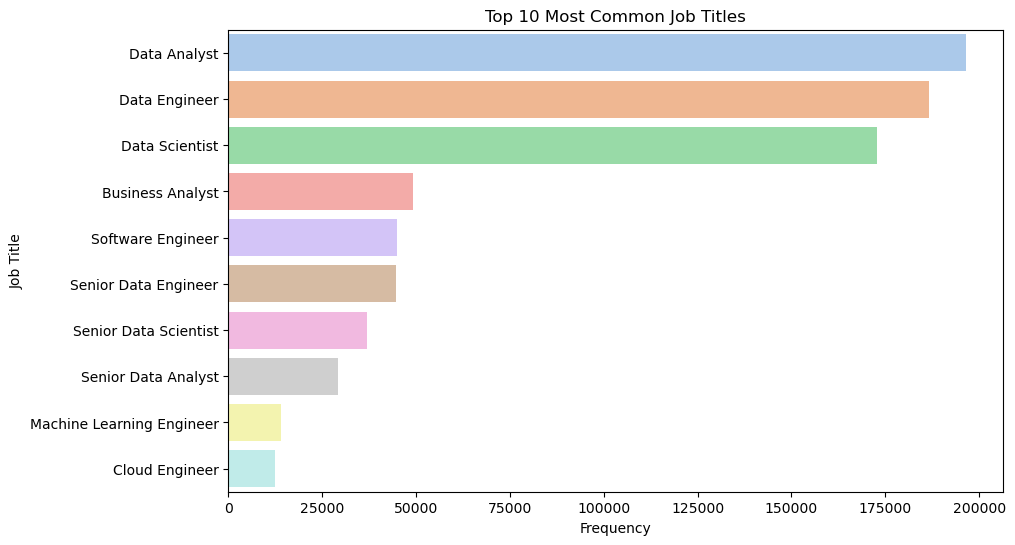

In [80]:
# Load the dataset
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Count the frequency of job top_titles
top_titles = data['job_title_short'].value_counts().head(10)

# Plotting the top job top_titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='pastel')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()


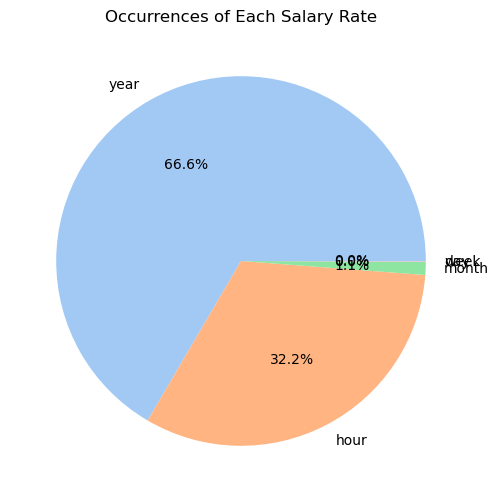

In [82]:
# Load the dataset
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Count the occurrences of each salary rate
salary_rate_counts = data['salary_rate'].value_counts()

# Choose a Seaborn color palette
palette = sns.color_palette('pastel')  # You can change this to 'muted', 'bright', etc.

# Plotting the occurrences of each salary rate as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(salary_rate_counts.values, labels=salary_rate_counts.index, autopct='%1.1f%%', colors=palette)
plt.title('Occurrences of Each Salary Rate')
plt.show()


In [98]:
import ast

# Function to load data and recommend jobs based on skills input
def recommend_jobs(file_path, skills, top_n=5):
    try:
        # Load the dataset
        data = pd.read_csv(file_path)
        
        # Preprocess description_tokens column using safe evaluation
        data['description_tokens'] = data['description_tokens'].apply(preprocess_tokens)
        
        # Convert skills input to set for efficient matching
        skills_set = set(skills.split(','))  # Assuming skills are comma-separated
        
        # Filter jobs based on skills matching
        filtered_jobs = data[data['description_tokens'].apply(lambda x: any(skill in x for skill in skills_set))]
        
        if filtered_jobs.empty:
            return "No jobs found matching the given skills."
        
        # Calculate median salary for each job title
        median_salaries = filtered_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)
        
        # Get top n jobs based on median salary
        top_jobs = median_salaries.head(top_n)
        
        # Return top jobs with title and company_name
        recommended_jobs = filtered_jobs[filtered_jobs['job_title_short'].isin(top_jobs.index)][['job_title_short', 'name']].drop_duplicates()
        
        return recommended_jobs
    
    except Exception as e:
        return f"Error: {str(e)}"

def preprocess_tokens(x):
    try:
        # Safely evaluate description_tokens using ast.literal_eval if it's a string
        if isinstance(x, str) and pd.notnull(x):
            return ast.literal_eval(x)
        else:
            return []  # Return empty list for non-string or null values
    except Exception as e:
        print(f"Error processing tokens: {e}")
        return []  # Return empty list if evaluation fails

# Example usage:
file_path = r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv"
user_skills = input("Enter a list of skills separated by commas (e.g., Python, SQL): ")

recommended_jobs = recommend_jobs(file_path, user_skills)
if isinstance(recommended_jobs, str):
    print(recommended_jobs)
else:
    print("Top 5 Recommended Jobs:")
    print(recommended_jobs)


Enter a list of skills separated by commas (e.g., Python, SQL):  SQL


Error processing tokens: malformed node or string on line 1: <ast.Name object at 0x00000245015A3D90>
Error processing tokens: invalid syntax (<unknown>, line 1)
Error processing tokens: invalid syntax (<unknown>, line 1)
Error processing tokens: invalid syntax (<unknown>, line 1)
Error processing tokens: invalid syntax (<unknown>, line 1)
No jobs found matching the given skills.


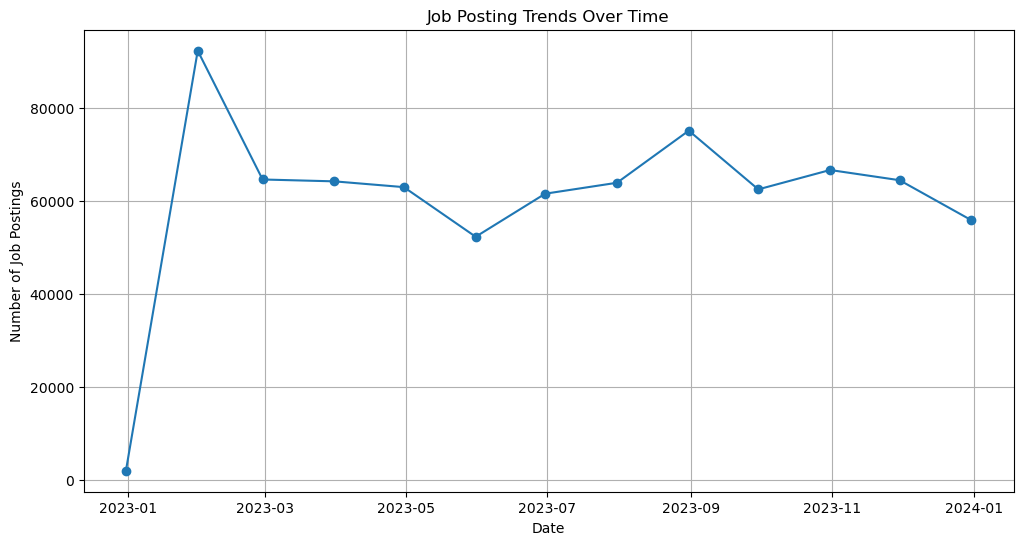

In [100]:
# Load data
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Convert job_posted_date to datetime
data['job_posted_date'] = pd.to_datetime(data['job_posted_date'])

# Group by month and count job postings
monthly_postings = data.resample('M', on='job_posted_date').size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_postings.index, monthly_postings.values, marker='o')
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.show()


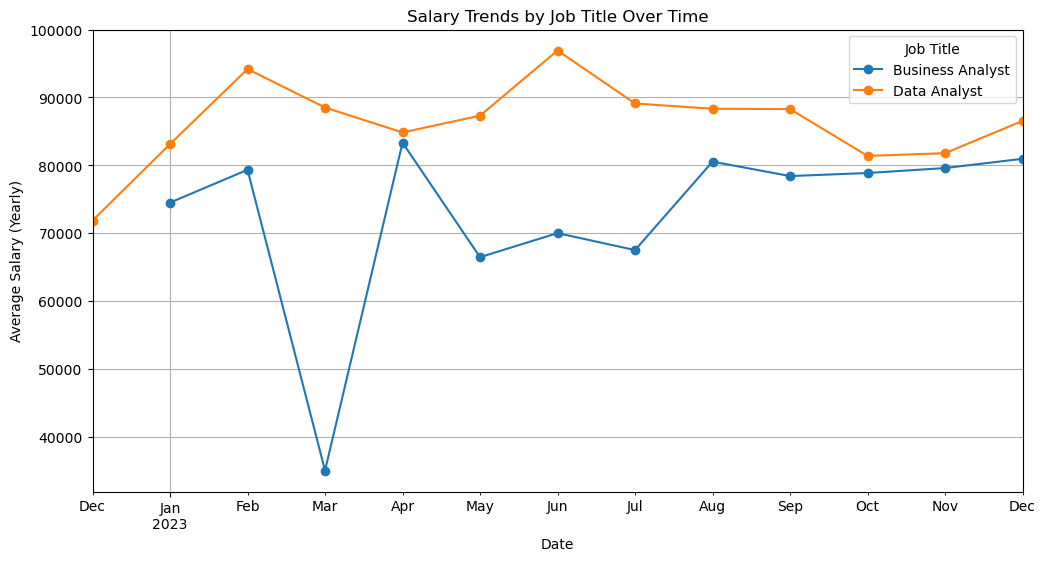

In [106]:
# Load data
file_path = (r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv")
data = pd.read_csv(file_path)

# Convert job_posted_date to datetime
data['job_posted_date'] = pd.to_datetime(data['job_posted_date'])

# Filter for specific job titles (e.g., Data Scientist, Software Engineer)
titles = ['Data Analyst', 'Business Analyst']
filtered_data = data[data['job_title'].isin(titles)]

# Group by month and calculate average salary for each title
salary_trends = filtered_data.groupby([pd.Grouper(key='job_posted_date', freq='M'), 'job_title'])['salary_year_avg'].mean().unstack()

# Plot
salary_trends.plot(figsize=(12, 6), marker='o')
plt.title('Salary Trends by Job Title Over Time')
plt.xlabel('Date')
plt.ylabel('Average Salary (Yearly)')
plt.grid(True)
plt.legend(title='Job Title')
plt.show()


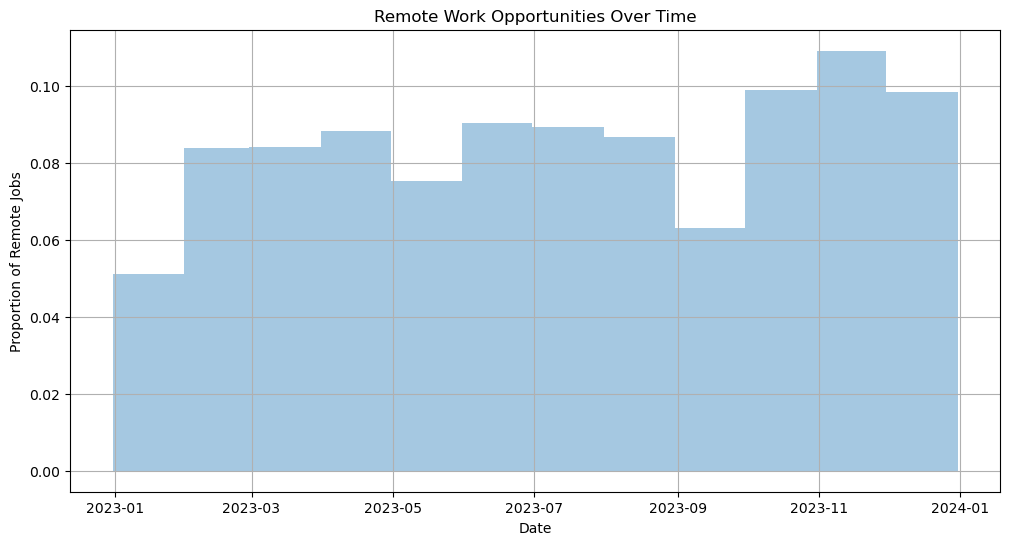

In [112]:
# Convert job_posted_date to datetime
data['job_posted_date'] = pd.to_datetime(data['job_posted_date'])

# Group by month and calculate proportion of remote jobs
remote_trends = data.groupby([pd.Grouper(key='job_posted_date', freq='M')])['job_work_from_home'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.fill_between(remote_trends.index, remote_trends.values, step='post', alpha=0.4)
plt.title('Remote Work Opportunities Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Remote Jobs')
plt.grid(True)
plt.show()


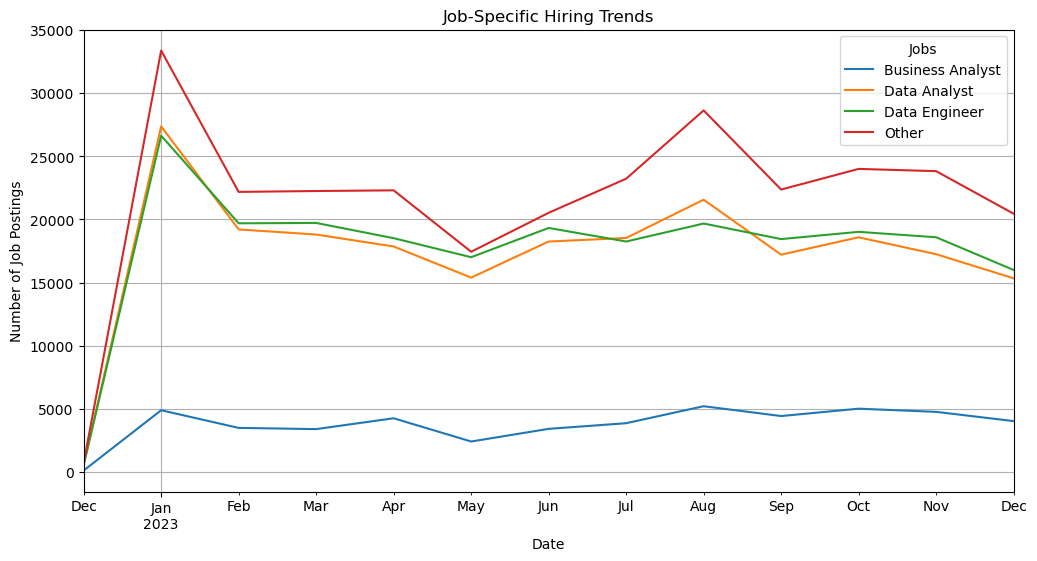

In [132]:
# Assuming job_title contains industry-specific keywords (e.g., Data Analyst, Business Analyst, Data Engineer)
industries = ['Data Analyst', 'Business Analyst', 'Data Engineer']
data['industry'] = data['job_title_short'].apply(lambda x: next((industry for industry in industries if isinstance(x, str) and industry in x), 'Other'))

# Group by month and industry, and count job postings
industry_trends = data.groupby([pd.Grouper(key='job_posted_date', freq='M'), 'industry']).size().unstack().fillna(0)

# Plot
industry_trends.plot(figsize=(12, 6))
plt.title('Job-Specific Hiring Trends')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.legend(title='Jobs')
plt.show()


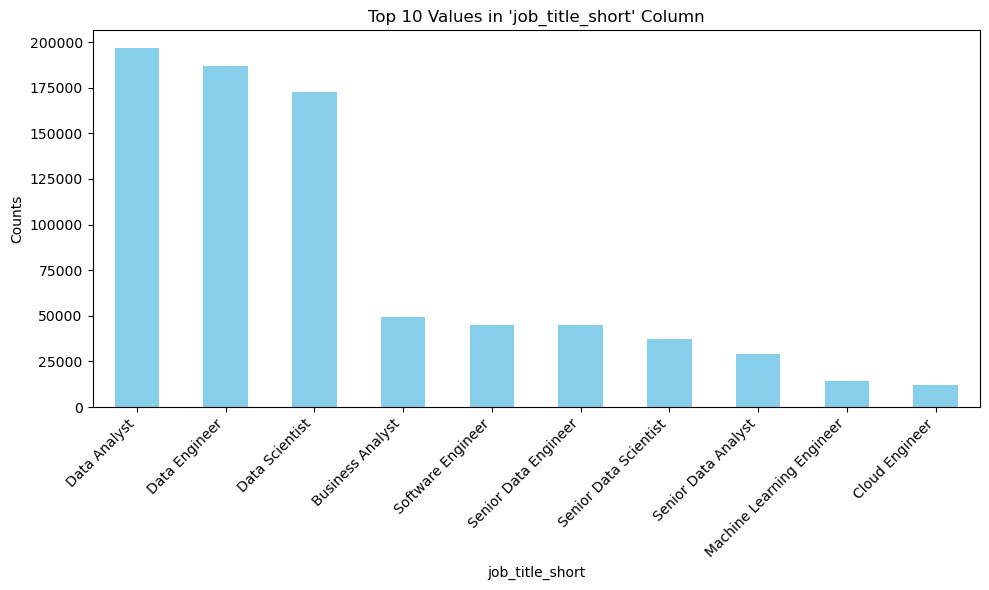

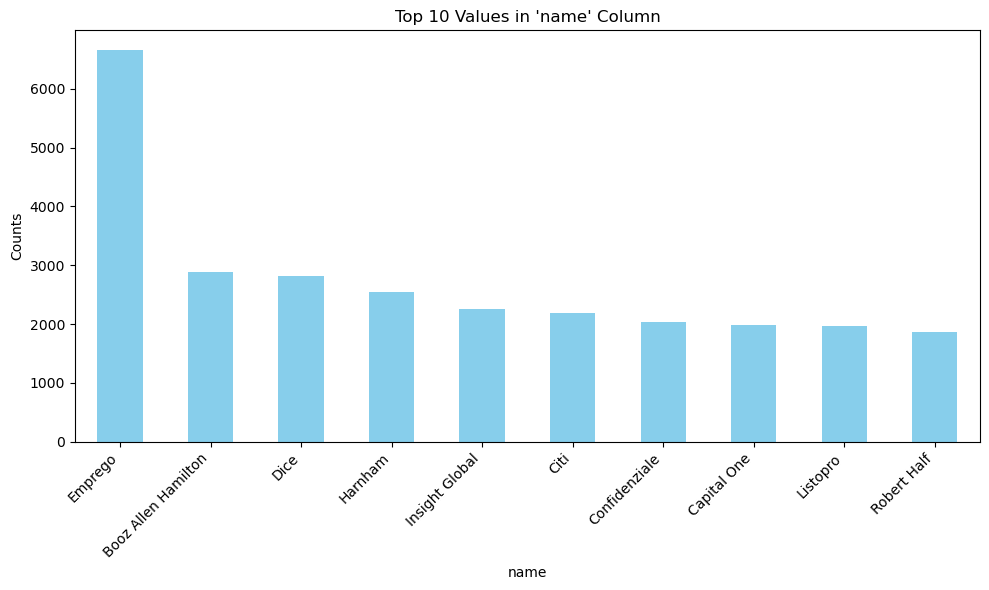

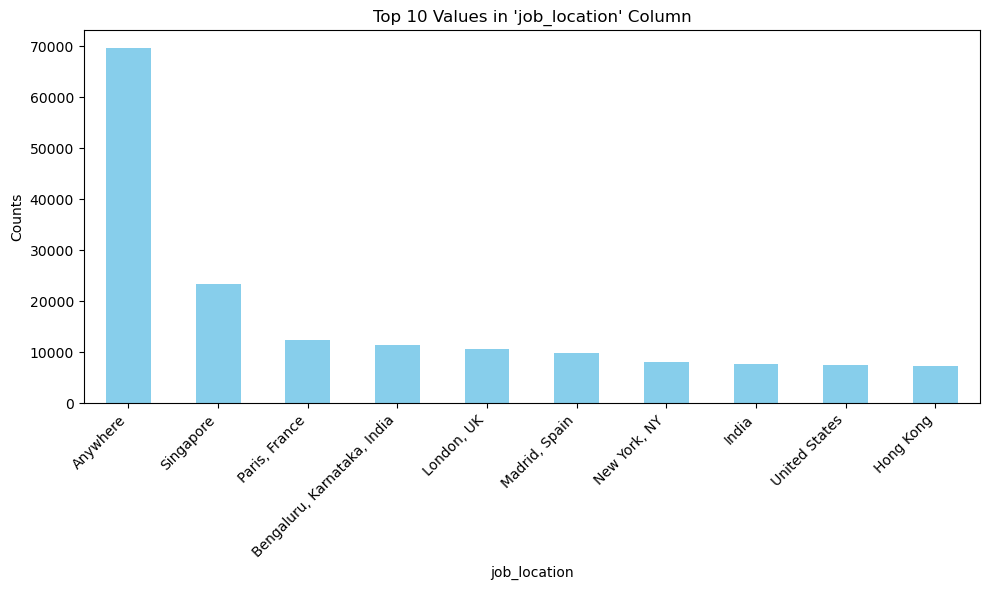

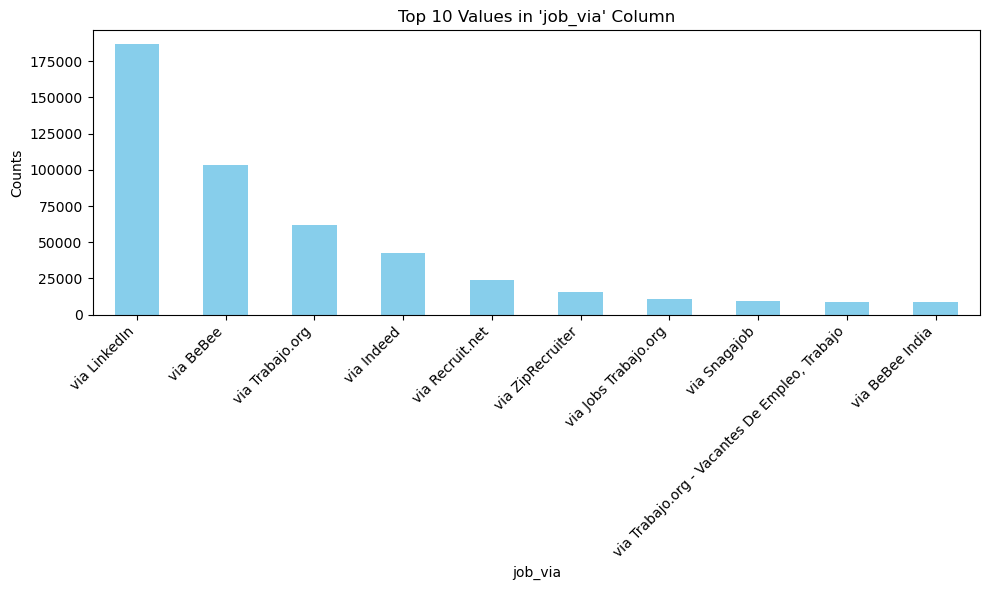

In [142]:
# Load data
job_postings_file = r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\job_postings_fact.csv"
company_dim_file = r"C:\Users\Mnced\Documents\Analysis_Projects\csv_files\company_dim.csv"

job_postings = pd.read_csv(job_postings_file)
company_dim = pd.read_csv(company_dim_file)

# Merge job_postings_fact with company_dim on company_id
merged_data = pd.merge(job_postings, company_dim, on='company_id', how='inner')

# Define the EDA plotting function
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 6))
    merged_data[column].value_counts().nlargest(topn).plot(kind='bar', color='skyblue')
    plt.title(f"Top {topn} Values in '{column}' Column")
    plt.ylabel("Counts")
    plt.xlabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Columns to analyze
columns = ['job_title_short', 'name', 'job_location', 'job_via']

# Generate plots for each column
for column in columns:
    eda_plot(column)


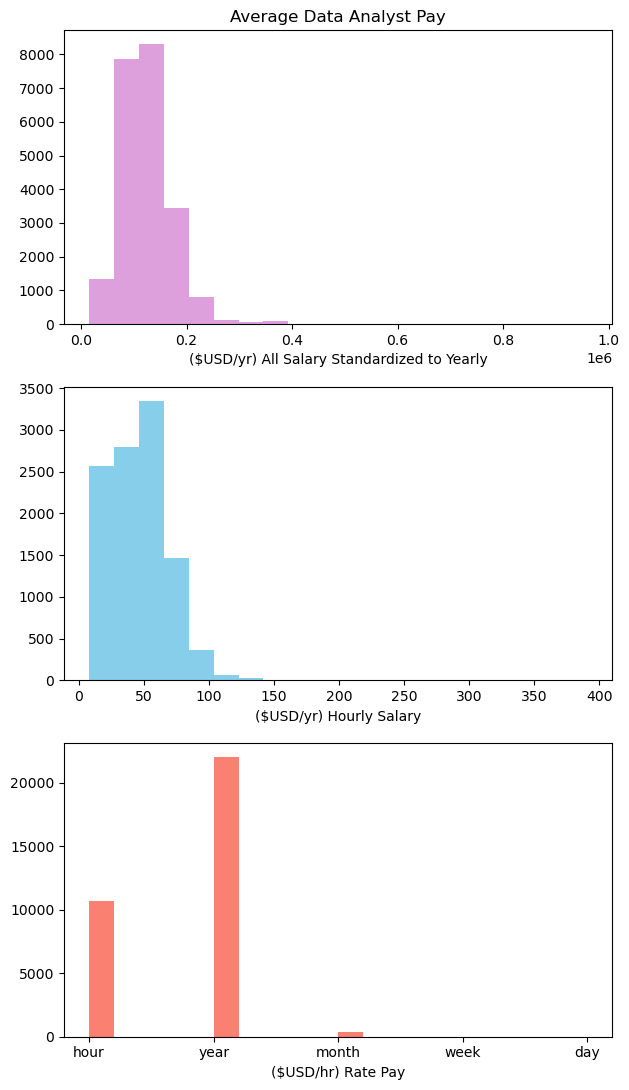

In [148]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)
fig.set_figheight(11)  # Adjust the figure height

# Plotting histograms for each salary-related column
axs[0].hist(data.salary_year_avg.dropna(), bins=20, color='plum')
axs[0].set_title("Average Data Analyst Pay")
axs[0].set_xlabel("($USD/yr) All Salary Standardized to Yearly")

axs[1].hist(data.salary_hour_avg.dropna(), bins=20, color='skyblue')
axs[1].set_xlabel("($USD/yr) Hourly Salary")

axs[2].hist(data.salary_rate.dropna(), bins=20, color='salmon')
axs[2].set_xlabel("($USD/hr) Rate Pay")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
